In [184]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import qiskit_aer
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit import transpile
import matplotlib.pyplot as plt
import math
from qiskit.visualization import plot_histogram as histo
from match_circuit import get_radian_names

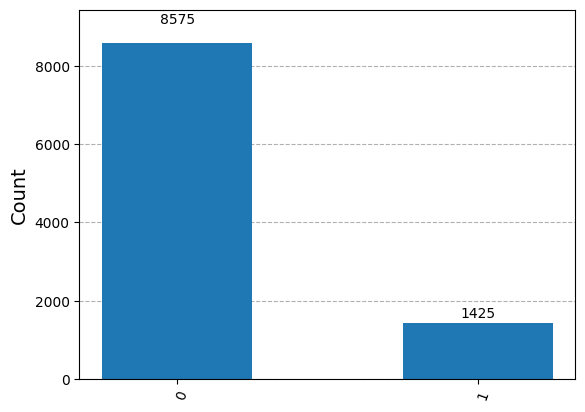

In [173]:
qc_a = QuantumCircuit(1, 1)
# qc_a.h(1)
qc_a.ry(math.pi/1.5, 0)
qc_a.h(0)
# qc_a.ch(0, 1)
# qc_a.h(1)
# qc_a.h(1)
# qc_a.rx(math.pi*2, 0)
# qc_a.rz(math.pi/4, 1)
qc_a.measure([0], [0])

optimization_level = 1
backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

qca_trans = pm2.run(qc_a)

job = backend.run(qca_trans, shots=10000)
histo(job.result().get_counts())

In [147]:
qca_trans.draw()

global phase: 7π/4
               ┌─────────┐┌────┐┌─────────┐                 ┌─┐         
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├───■─────────────┤M├─────────
               └┬────────┤├────┤├─────────┴┐┌─┴─┐┌─────────┐└╥┘┌────┐┌─┐
      q_1 -> 1 ─┤ Rz(-π) ├┤ √X ├┤ Rz(3π/4) ├┤ X ├┤ Rz(π/4) ├─╫─┤ √X ├┤M├
                └────────┘└────┘└──────────┘└───┘└─────────┘ ║ └────┘└╥┘
ancilla_0 -> 2 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
ancilla_1 -> 3 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
ancilla_2 -> 4 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
          c: 2/══════════════════════════════════════════════╩════════╩═
                                                             0        1

In [148]:
qc_a.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ H ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [150]:
from qiskit.algorithm import Grover
from qiskit.primitives import Sampler
 
grover = Grover(sampler=Sampler())

ModuleNotFoundError: No module named 'qiskit.algorithm'

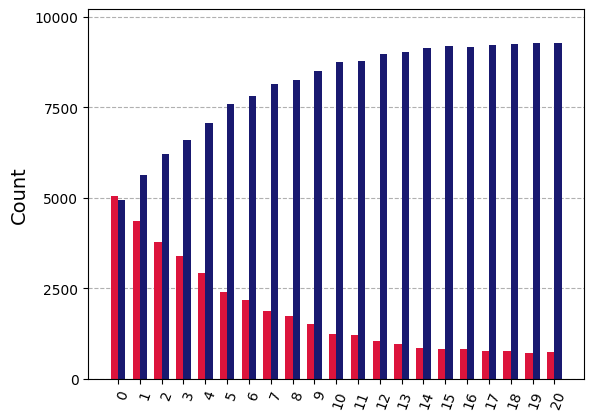

In [453]:
# optimization_level = 1
# backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
# pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

n = 20
records0 = {}
records1 = {}
records2 = {}
for i in range(n+1):
    qc_a = QuantumCircuit(1, 1)
    qc_a.h(0)
    qc_a.ry(math.pi/(1+i/n), 0)
    
    qc_a.measure([0], [0])
    qca_trans = pm2.run(qc_a)
    job = backend.run(qca_trans, shots=10000)
    cnt = job.result().get_counts()
    records0[i] = cnt["0"]
    records1[i] = cnt["1"]
    records2[i] = cnt["0"] / (cnt["0"] + cnt["1"])
histo([records0, records1], bar_labels=False, color=['crimson','midnightblue'])

# histo(records2, bar_labels=False, color=['crimson','midnightblue'])

In [470]:
def getprobcirc(probs):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(math.pi * probs[0], 0)
    qc.ry(math.pi * probs[1], 1)
    # qc.h(1)
    # qc.x(1)
    qc.measure([0,1], [0,1])
    qct = pm2.run(qc)
    job = backend.run(qct, shots=10000)
    cnt = job.result().get_counts()
    return histo(cnt)

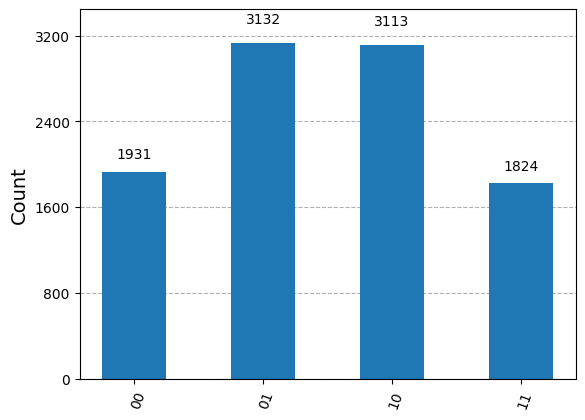

In [474]:
getprobcirc([0.4, 1])

In [465]:
(5634+2809)/10000

0.8443